In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from umap import UMAP


from sklearn.preprocessing import normalize

In [74]:
df = pd.read_csv('./datasets/stars.csv')

<Axes: >

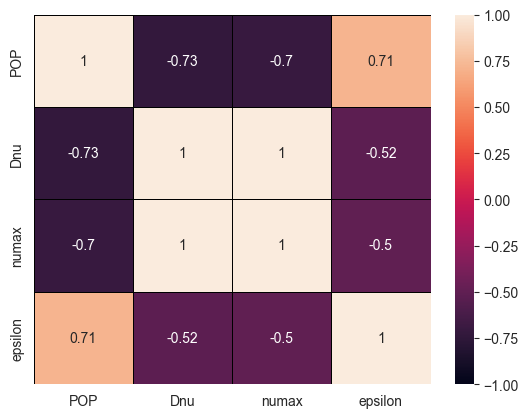

In [75]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', vmin=-1, vmax=1)

POP:  
0 - RGB (Red Gaint Branch)  
1 - HeB (Helium Burning)  
DNU - среднее частотное разделение  
numax - частота максимальной мощности колебаний  
epsilon - расположение  

In [76]:
def print_clusters(labels, X, cols):
    _, ax = plt.subplots(len(cols), len(cols), figsize=(15, 15))

    for i, col_f in enumerate(cols):
        for j, col_s in enumerate(cols):
            ax[i][j].scatter(X[:,i], X[:,j], c=labels, cmap='rainbow')

            ax[i][j].set_title(f'{col_f} - {col_s}')
            ax[i][j].set_xlabel(col_f)
            ax[i][j].set_ylabel(col_s)

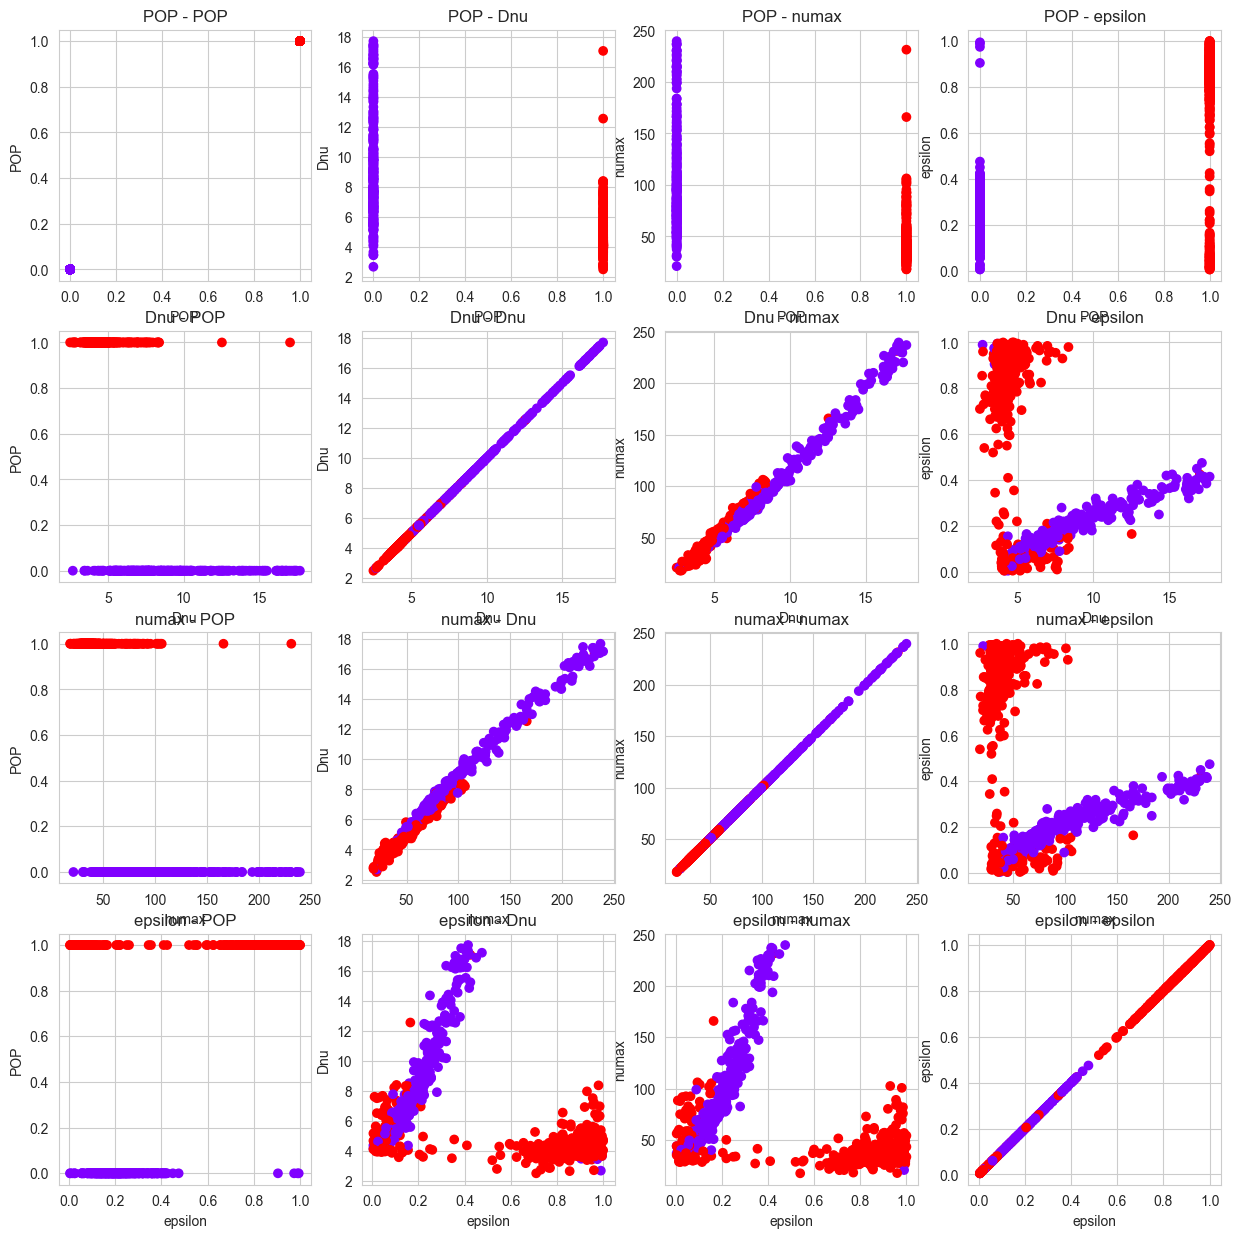

In [77]:
print_clusters(df['POP'], df.to_numpy(), df.columns)

In [ ]:
count_cols = len(df.columns)
_, ax = plt.subplots(count_cols, count_cols, figsize=(15, 15))

for i, col_f in enumerate(df.columns):
    for j, col_s in enumerate(df.columns):
        ax[i][j].scatter(df[col_f], df[col_s], c=df['POP'], cmap='rainbow')

        ax[i][j].set_title(f'{col_f} - {col_s}', fontsize=10)

In [78]:
labels = df['POP']
x = df[['Dnu', 'numax', 'epsilon']]

In [79]:
x_norm = normalize(x)

In [80]:
x.shape, x_norm.shape

((1001, 3), (1001, 3))

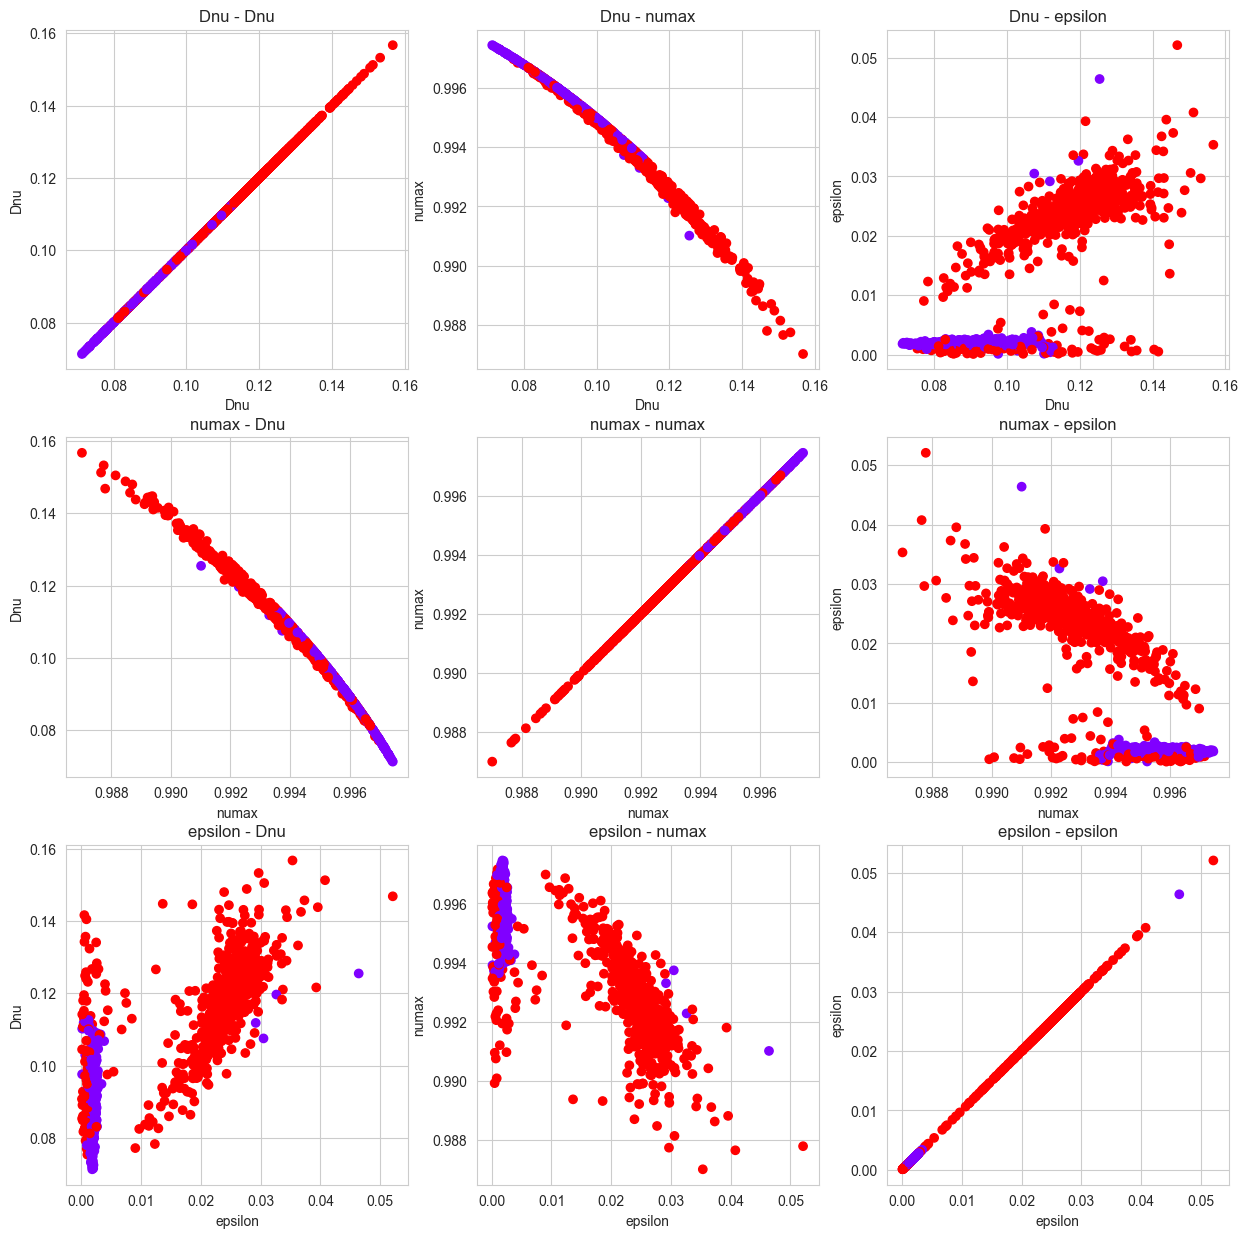

In [81]:
print_clusters(df['POP'], x_norm, ['Dnu', 'numax', 'epsilon'])

In [85]:
def frange(start, stop, step):
	i = start
	while i < stop:
		yield i
		i += step

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [87]:
train_x, test_x, train_y, test_y = train_test_split(x, labels, test_size=0.2, random_state=42)

In [88]:
x_umap_train = UMAP(n_neighbors=8, random_state=42).fit_transform(train_x)
x_umap_test = UMAP(n_neighbors=8, random_state=42).fit_transform(test_x)

In [89]:
log_model = LogisticRegression()
log_model.fit(train_x, train_y)
pred_y = log_model.predict(test_x)
log_error = mean_squared_error(test_y, pred_y)

In [90]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_x, train_y)
tree_pred_y = tree_clf.predict(test_x)
tree_error = mean_squared_error(test_y, tree_pred_y)

In [104]:
tree_clf.decision_path(test_x)

<201x51 sparse matrix of type '<class 'numpy.int64'>'
	with 956 stored elements in Compressed Sparse Row format>

Text(0.5, 1.0, 'Decision Tree Predicted labels. Error: 0.0398')

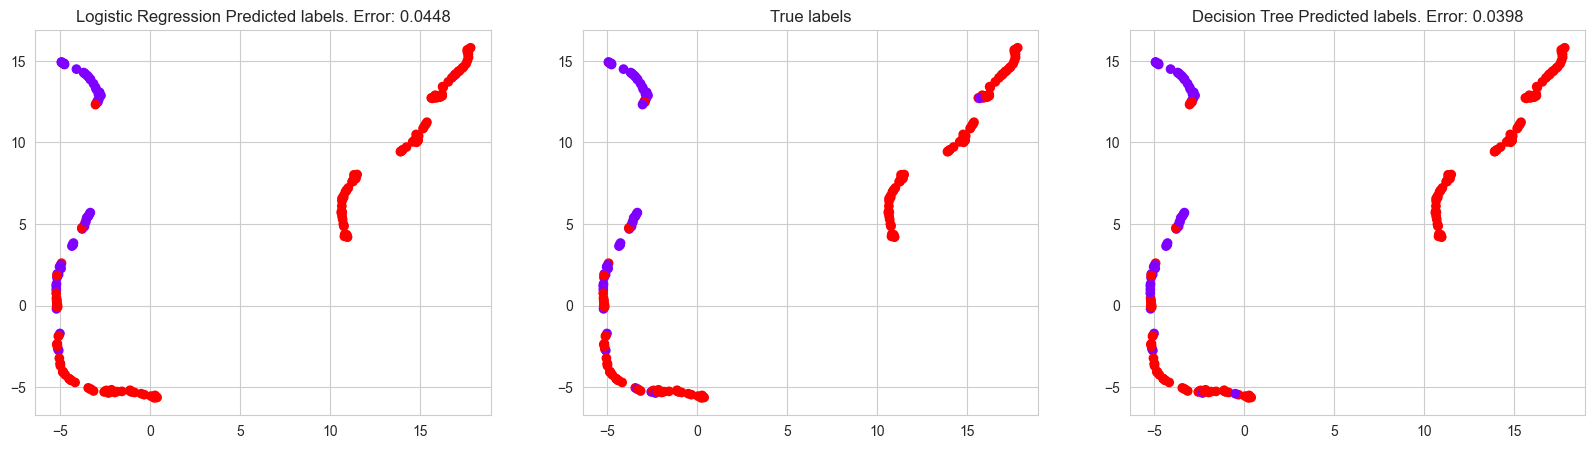

In [91]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(x_umap_test[:,0], x_umap_test[:,1], c=pred_y, cmap='rainbow')
plt.title(f'Logistic Regression Predicted labels. Error: {round(log_error, 4)}')

plt.subplot(132)
plt.scatter(x_umap_test[:,0], x_umap_test[:,1], c=test_y, cmap='rainbow')
plt.title('True labels')

plt.subplot(133)
plt.scatter(x_umap_test[:,0], x_umap_test[:,1], c=tree_pred_y, cmap='rainbow')
plt.title(f'Decision Tree Predicted labels. Error: {round(tree_error, 4)}')

In [95]:
pred_y.shape, test_x.shape

((201,), (201, 3))

Logistic Regression confusion matrix. Scores: F1, accuracy

Logistic Regression
F1-score: 0.969
Accuracy: 0.955


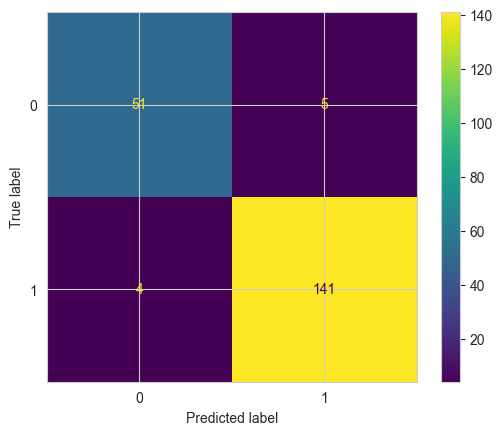

In [40]:
cm = confusion_matrix(test_y, pred_y)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
my_f1 = 2 * precision * recall / (precision + recall)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f'Logistic Regression\nF1-score: {round(my_f1, 3)}\nAccuracy: {round(accuracy, 3)}')

Decision Tree confusion matrix. Scores: F1, accuracy

Decision Tree
F1-score: 0.972
Accuracy: 0.96


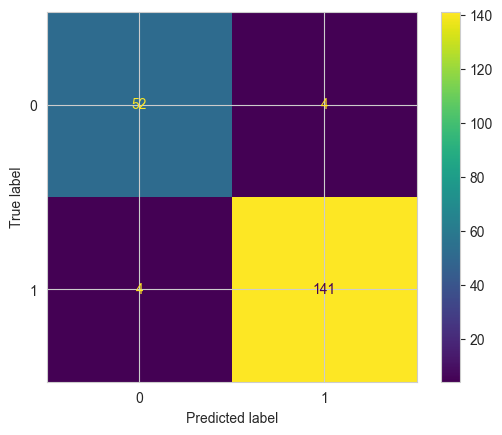

In [41]:
cm = confusion_matrix(test_y, tree_pred_y)
tn, fp, fn, tp = cm.ravel()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
my_f1 = 2 * precision * recall / (precision + recall)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f'Decision Tree\nF1-score: {round(my_f1, 3)}\nAccuracy: {round(accuracy, 3)}')

In [42]:
def print_cv_scores(cv_count: int, scores: np.ndarray) -> None:
    X_axis = range(cv_count)
    plt.ylim(0.4, 1)
    plt.grid(True, axis='y')
    plt.bar(X_axis, scores, 0.4)
    plt.xticks(X_axis, [f'{i + 1} Fold' for i in X_axis])

In [43]:
def print_train_test_cv_scores(cv_count: int, train_scores: np.ndarray, test_scores: np.ndarray, numsubplot, title: str) -> None:
    X_axis = np.arange(cv_count)
    plt.subplot(*numsubplot)
    plt.ylim(0.4, 1)
    plt.grid(True, axis='y')
    plt.bar(X_axis-0.2, train_scores, 0.4, label='Train')
    plt.bar(X_axis+0.2, test_scores, 0.4, color='red', label='Validation')
    plt.xticks(X_axis, [f'{i + 1} Fold' for i in X_axis])
    plt.title(title)
    plt.legend()

Logistic Regression cross-validation tests.
1) With different solvers
2) With different parameter C
3) Different C for different solvers

In [ ]:

from sklearn.model_selection import cross_validate
log_clf = LogisticRegression(random_state=42)
cv_count = 5
res = cross_validate(log_clf, train_x, train_y, cv=cv_count, scoring='f1', return_train_score=True)
X_axis = np.arange(cv_count)
plt.bar(X_axis-0.2, res['train_score'], 0.4, label='Train')
plt.bar(X_axis+0.2, res['test_score'], 0.4, color='red', label='Validation')
plt.xticks(X_axis, [f'{i + 1} Fold' for i in X_axis])
plt.legend()
plt.show()

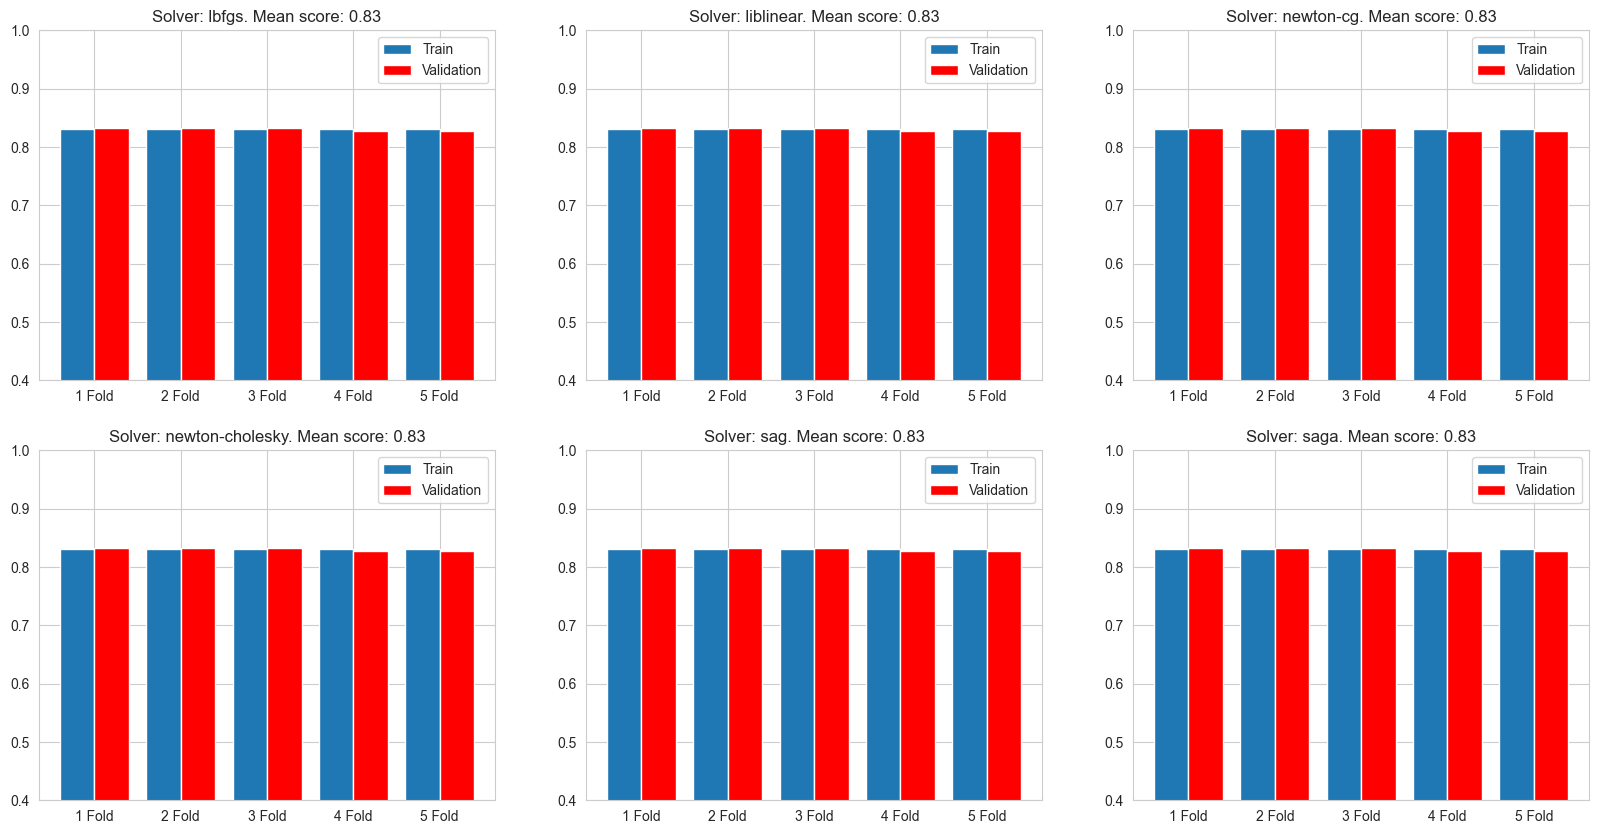

In [63]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
cv_count = 5
plt.figure(figsize=(20, 10))
for i, solver in enumerate(solvers):
    log_clf = LogisticRegression(solver=solver, random_state=42)

    res = cross_validate(log_clf, train_x, train_y, cv=cv_count, scoring='f1', return_train_score=True)
    print_train_test_cv_scores(cv_count, res['train_score'], res['test_score'], numsubplot=(2, 3, i + 1), title=f"Solver: {solver}. Mean score: {round(res['test_score'].mean(), 3)}")

plt.show()

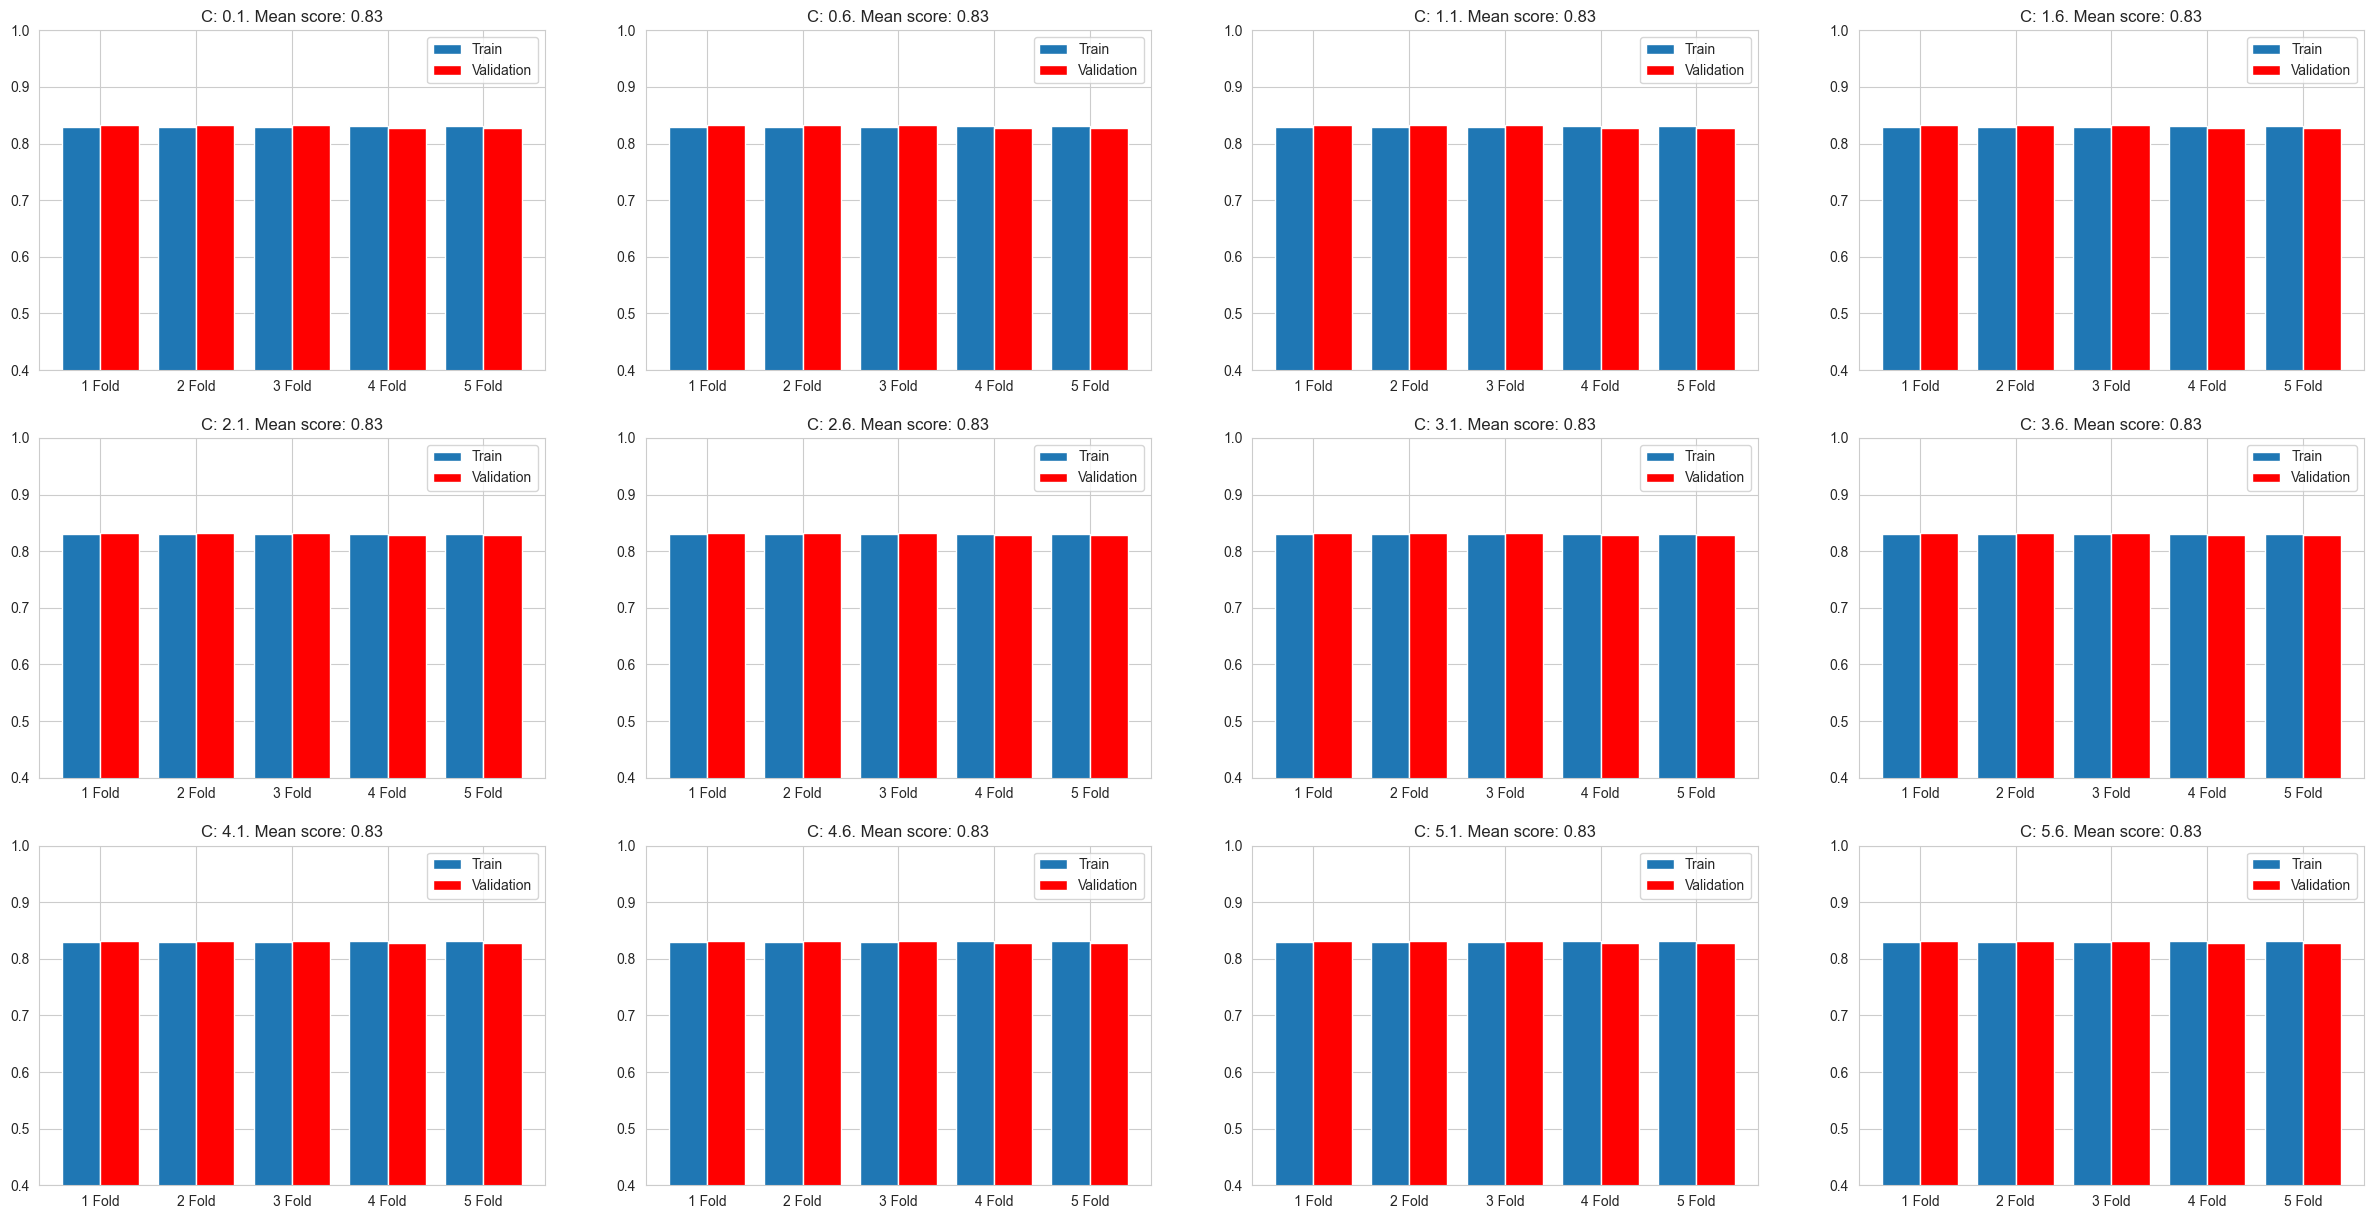

In [64]:
plt.figure(figsize=(30, 15))
cv_count = 5
for i, c in enumerate(frange(0.1, 6, 0.5)):
    log_clf = LogisticRegression(C=c, random_state=42)

    res = cross_validate(log_clf, train_x, train_y, cv=cv_count, scoring='f1', return_train_score=True)
    print_train_test_cv_scores(cv_count, res['train_score'], res['test_score'], numsubplot=(3, 4, i + 1), title=f"C: {round(c, 2)}. Mean score: {round(res['test_score'].mean(), 3)}")

plt.show()

C:\Users\ipuzanov\PycharmProjects\BMSTU\venv10\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ipuzanov\PycharmProjects\BMSTU\venv10\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ipuzanov\PycharmProjects\BMSTU\venv10\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ipuzanov\PycharmProjects\BMSTU\venv10\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ipuzanov\PycharmProjects\BMSTU\venv10\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


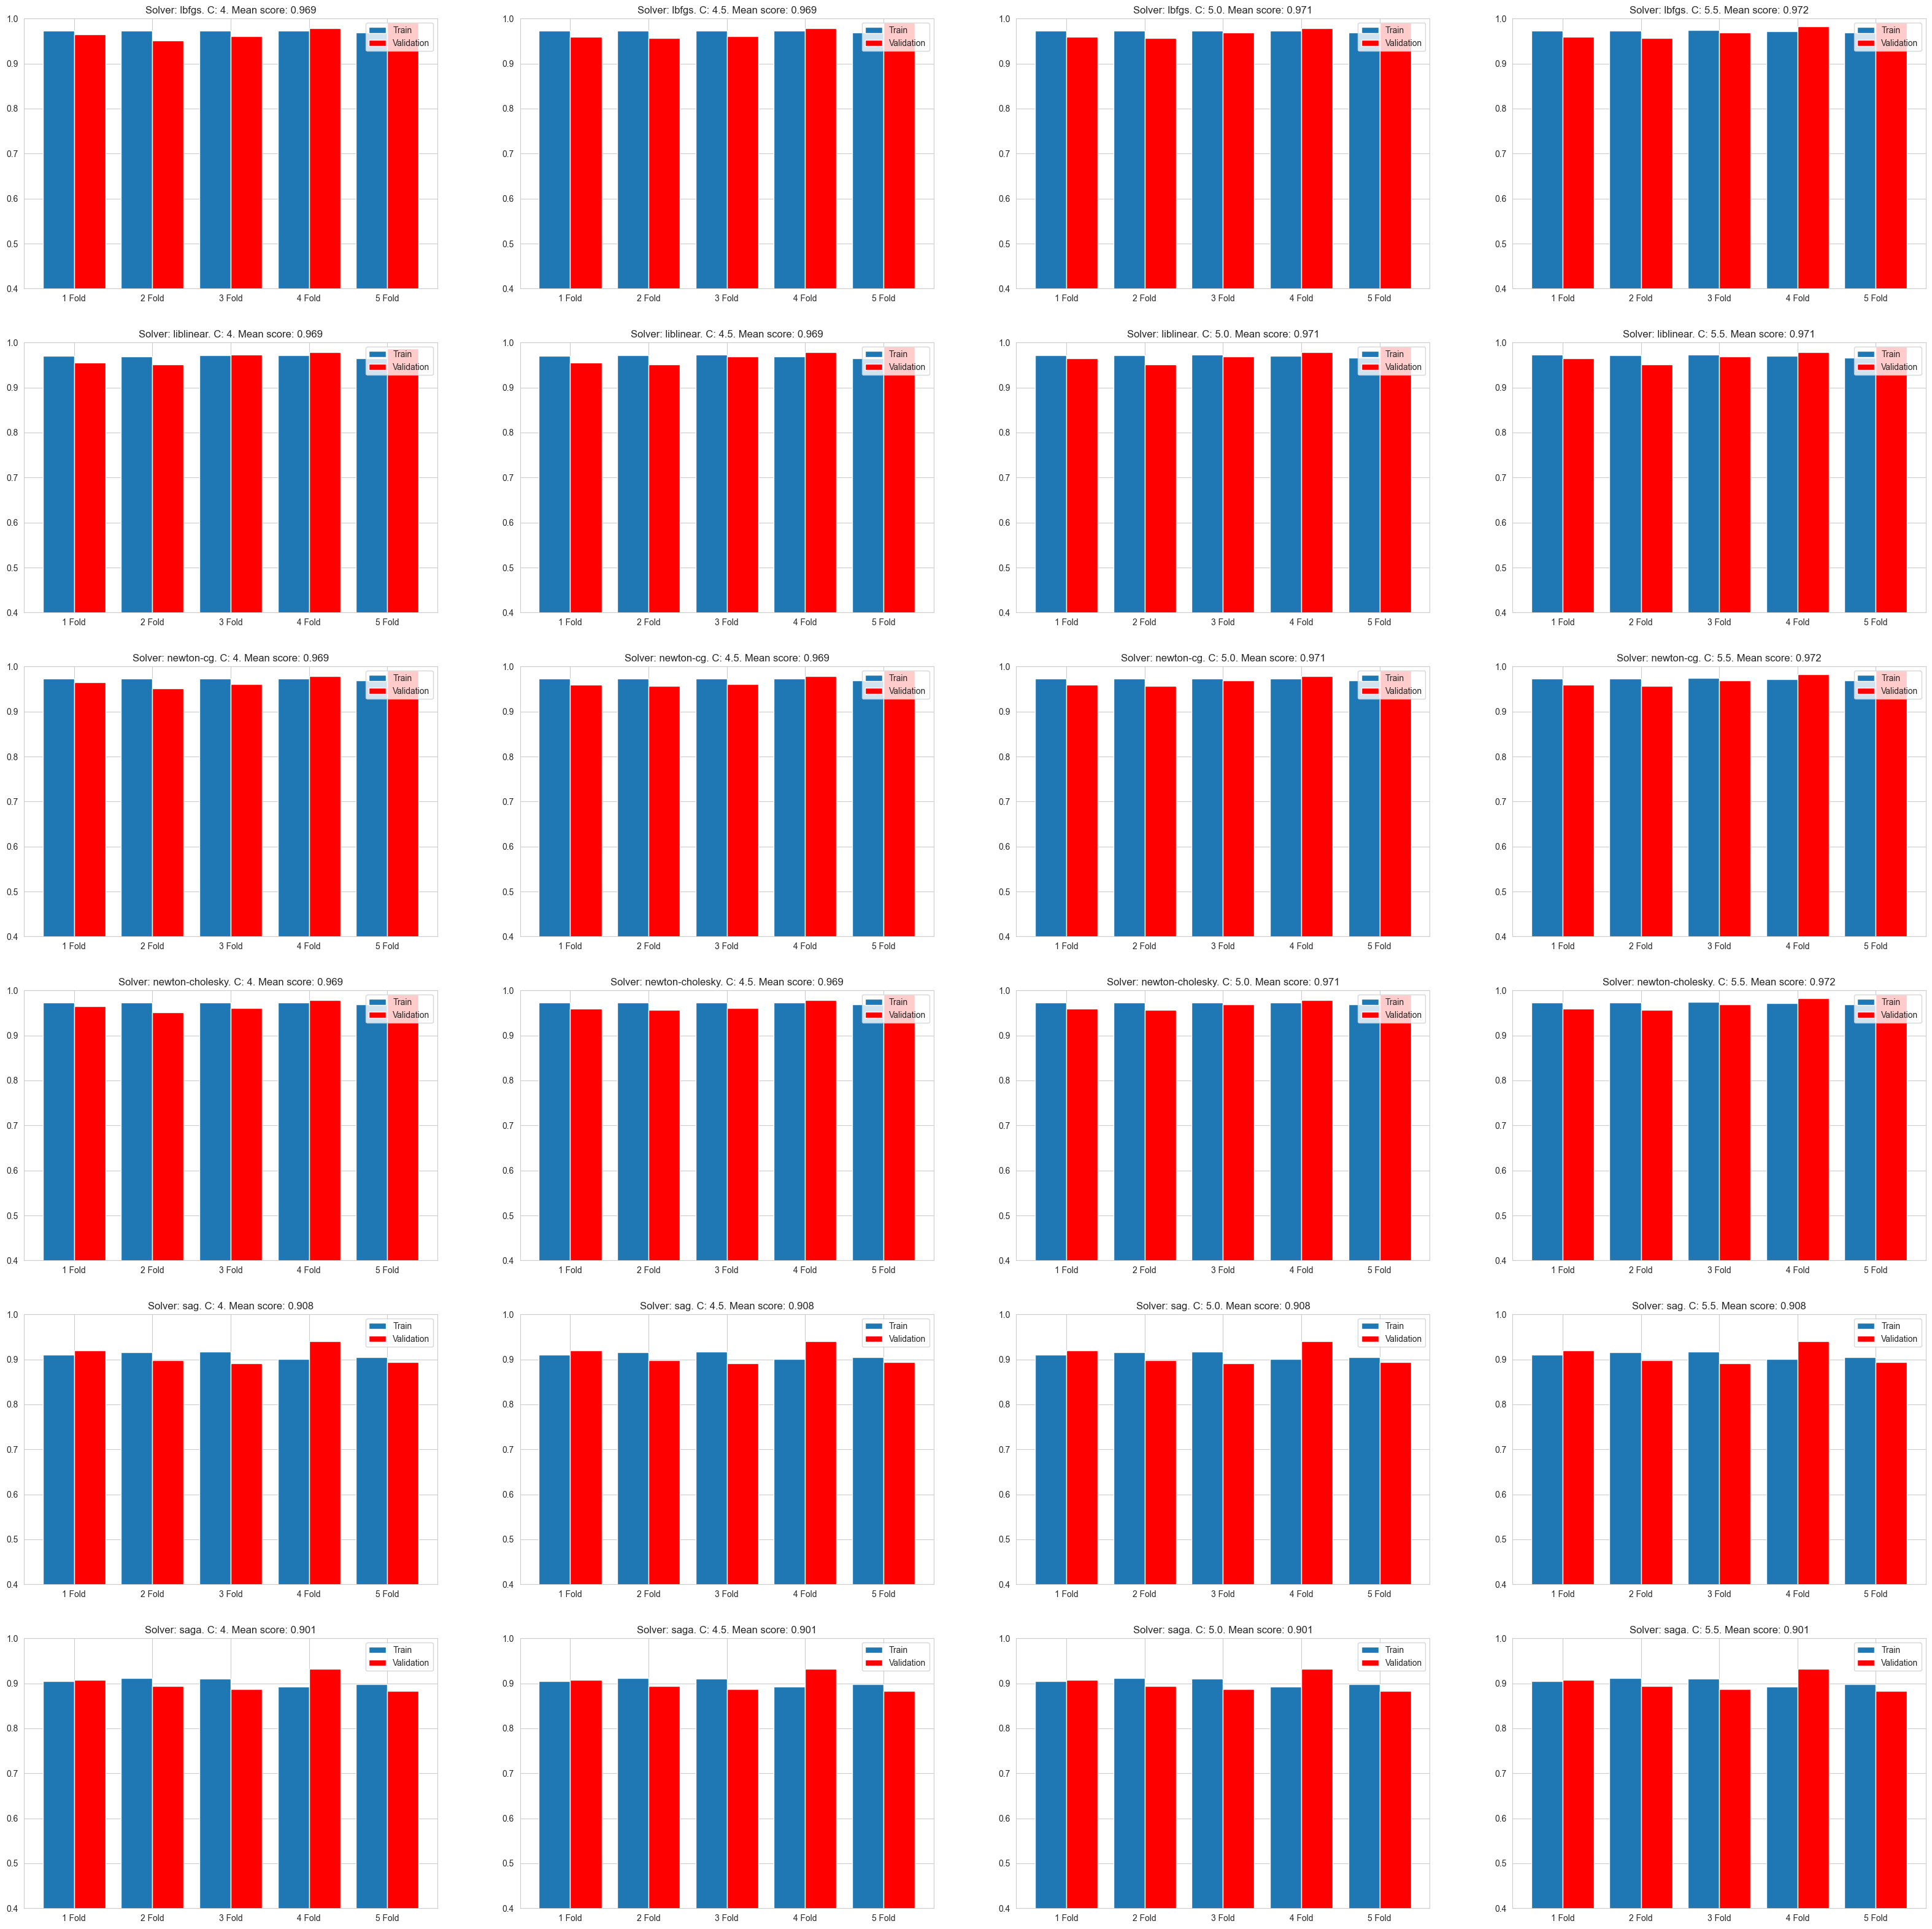

In [46]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
cv_count = 5
plt.figure(figsize=(40, 40))
for i, solver in enumerate(solvers):
    for j, c in enumerate(frange(4, 6, 0.5)):
        log_clf = LogisticRegression(solver=solver, C=c, random_state=42)

        res = cross_validate(log_clf, train_x, train_y, cv=cv_count, scoring='f1', return_train_score=True)
        print_train_test_cv_scores(cv_count, res['train_score'], res['test_score'], numsubplot=(len(solvers), int((6 - 4) // 0.5), (i * int((6 - 4) // 0.5) + j + 1)), title=f"Solver: {solver}. C: {c}. Mean score: {round(res['test_score'].mean(), 3)}")

plt.show()

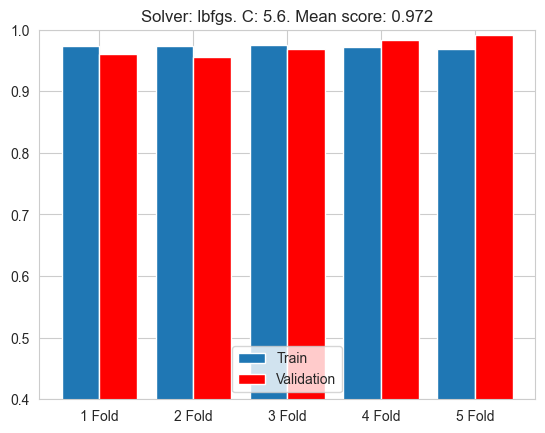

In [47]:
solver = 'lbfgs'
c = 5.6
log_clf = LogisticRegression(solver=solver, C=c, random_state=42)

res = cross_validate(log_clf, train_x, train_y, cv=cv_count, scoring='f1', return_train_score=True)
print_train_test_cv_scores(cv_count, res['train_score'], res['test_score'], numsubplot=(1, 1, 1), title=f"Solver: {solver}. C: {c}. Mean score: {round(res['test_score'].mean(), 3)}")

In [48]:
log_clf.fit(train_x, train_y)
pred_y = log_clf.predict(test_x)
print(f"Solver: {solver}. C: {c}. Score: {round(f1_score(test_y, pred_y), 3)}")

Solver: lbfgs. C: 5.6. Score: 0.966


Decision Tree cross-validation tests.
1) With different solvers
2) With different parameter C
3) Different C for different solvers

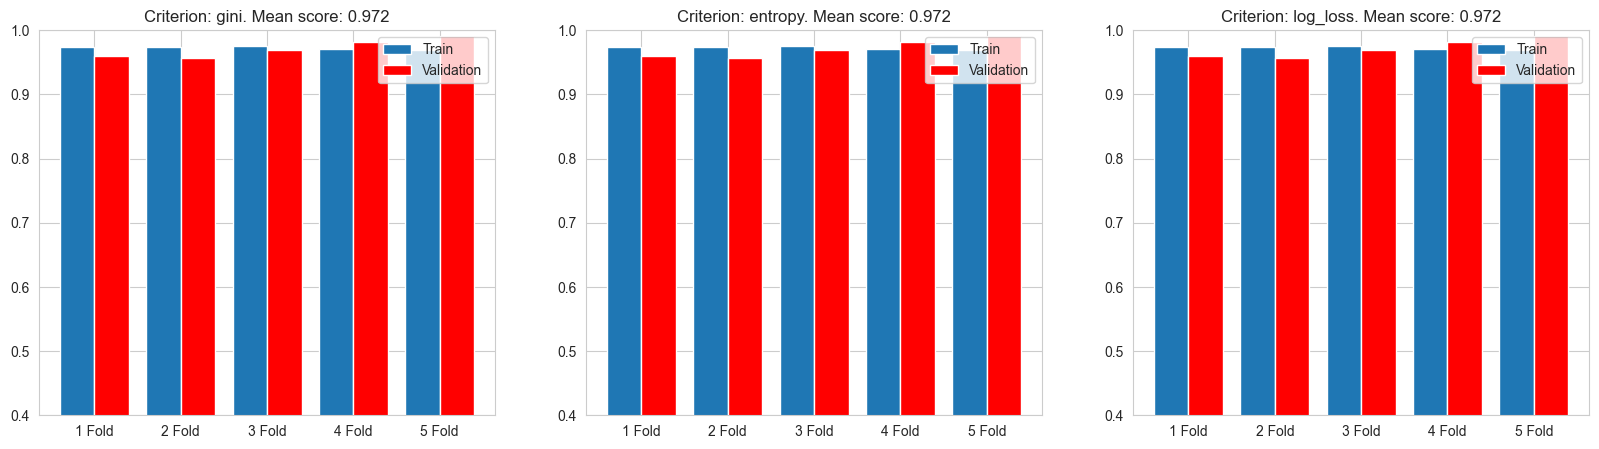

In [49]:
criterions = ['gini', 'entropy', 'log_loss']
cv_count = 5
plt.figure(figsize=(20, 5))
for i, criterion in enumerate(criterions):
    tree_clf = DecisionTreeClassifier(criterion=criterion, random_state=42)

    res = cross_validate(log_clf, train_x, train_y, cv=cv_count, scoring='f1', return_train_score=True)
    print_train_test_cv_scores(cv_count, res['train_score'], res['test_score'], numsubplot=(1, 3, i + 1), title=f"Criterion: {criterion}. Mean score: {round(res['test_score'].mean(), 3)}")

plt.show()

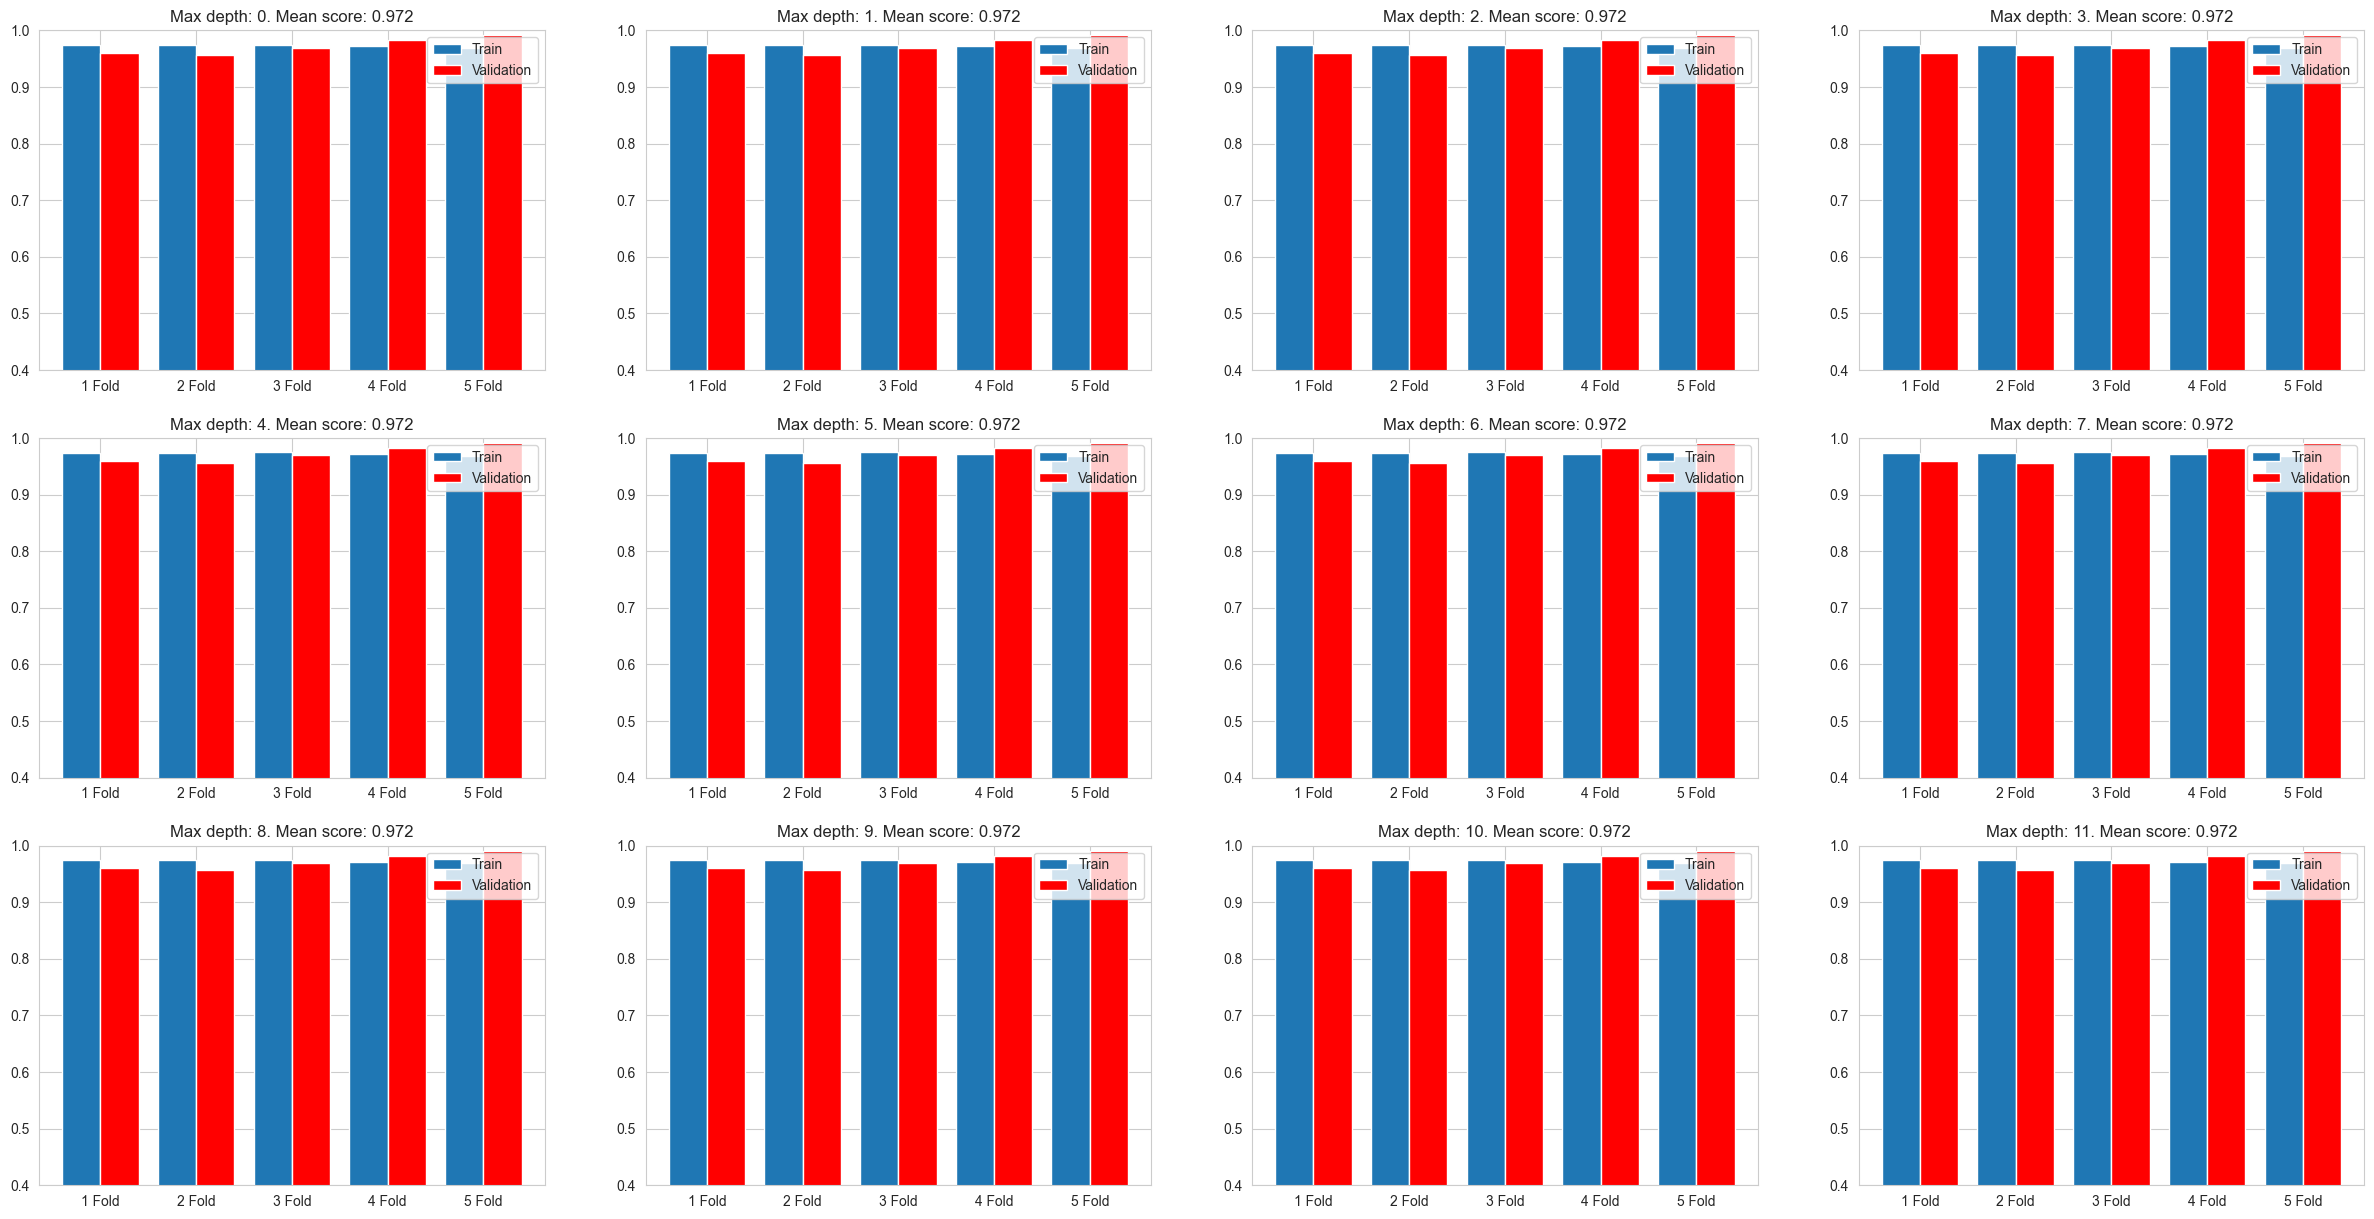

In [50]:
cv_count = 5
plt.figure(figsize=(30, 15))
for i, depth in enumerate(range(12)):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    res = cross_validate(log_clf, train_x, train_y, cv=cv_count, scoring='f1', return_train_score=True)
    print_train_test_cv_scores(cv_count, res['train_score'], res['test_score'], numsubplot=(3, 4, i + 1), title=f"Max depth: {depth}. Mean score: {round(res['test_score'].mean(), 3)}")

plt.show()